In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.ddpg as ddpg
import ray.rllib.agents.sac as sac
import seagul.envs
import numpy as np
from numpy import pi
import gym
from mpl_toolkits.mplot3d import Axes3D
#from simple_pid import PID

import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

import pandas as pd

In [5]:
home_path = '/home/sgillen/work/'

checkpoint_path = home_path + \
"seagul/seagul/notebooks/lorenz/data/tune/PPO/PPO_linear_z-v0_c7da6348_2020-02-04_14-22-08nhgwjtn4/checkpoint_481/checkpoint-481"

In [6]:
# Some delightfully ugly python to infer where everything else is...
config_path =  '/'.join(checkpoint_path.split('/')[:-2]) + '/params.json'
config = json.load(open(config_path))
env_name = config['env']

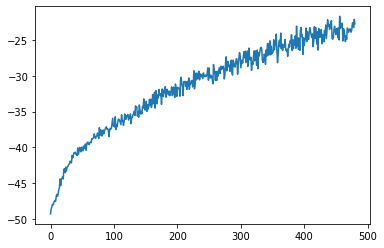

In [7]:
csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
df = pd.read_csv(csv_path)
plt.plot(df['episode_reward_mean'])

In [9]:
ray.shutdown()
ray.init()

# !! change this line to reflect the algorithm you used
trainer = ppo.PPOTrainer(config)#, config['env_name'])
#trainer = ddpg.DDPGTrainer(config)
#trainer = sac.SACTrainer(config)

trainer.restore(checkpoint_path)

2020-02-06 15:07:40,421	WARNING services.py:592 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-02-06 15:07:40,422	INFO resource_spec.py:212 -- Starting Ray with 15.23 GiB memory available for workers and up to 7.64 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-02-06 15:07:40,707	INFO services.py:1093 -- View the Ray dashboard at localhost:8265
2020-02-06 15:07:40,940	INFO trainer.py:370 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-02-06 15:07:40,954	INFO trainer.py:517 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-02-06 15:07:47,124	WARNING trainable.py:210 -- Getting current IP.
2020-02-06 15:07:47,125	INFO trainable.py:416 -- Restored on 128.111.57.96 from checkpoint: /home/sgillen/work/seagul/seagul/notebooks/lorenz/data/tune/PPO/PPO_linear_z-v0_c7da

In [14]:
#env = gym.make(env_name)
#env.unwrapped.reset_model = det_reset_model

# !! this needs to reflect the environemnt you trained in
env = gym.make(env_name)
#env._max_episode_steps = 100000
#env.state_noise_max = 5.0
obs = env.reset()
print(obs)

action_hist = []
m_act_hist = []
obs_hist = []
reward_hist = []

done = False
#while not done:
for i in range(1000):
    # for some algorithms you can get the sample mean out, need to change the value on the index to match your env for now
    # mean_actions = out_dict['behaviour_logits'][:17]
    # actions = trainer.compute_action(obs.flatten())
    
    sampled_actions, _ , out_dict = trainer.compute_action(obs,full_fetch=True)
    #mean_actions = out_dict['behaviour_logits'][:3]
    
    actions = sampled_actions
    #actions = np.zeros(3)
    #actions[0] = -obs[1]
   
    #s = 10; b = 8/3; r = 28
    #actions = np.zeros(3)
    #actions[0] = s * (obs[1] - obs[0]) + obs[0]
    #actions[1] = (r * obs[0] - obs[1] - obs[0] * obs[2]) + obs[1]
    #actions[2] = (obs[0] * obs[1] - b * obs[2]) + obs[2]
    
    obs, reward, done, _ = env.step(np.asarray(actions))
    
    # !! uncomment to render
    #env.render()
    
    action_hist.append(np.copy(actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))


    
print(sum(reward_hist))
print(len(reward_hist))
print(len(obs_hist))

action_hist = np.stack(action_hist)
obs_hist = np.stack(obs_hist)
reward_hist = np.stack(reward_hist)

#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()

[4.96900164 4.96900164 4.96900164 1.        ]


ValueError: ('Observation outside expected value range', Box(4,), array([  -5.80191192,  202.94187544, -145.01626604,    1.        ]))

In [13]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
#obs = env.reset()
trainer.compute_action(obs, full_fetch=True)


ValueError: ('Observation outside expected value range', Box(4,), array([ -9.24955121, 200.31643712, -45.62884819,   1.        ]))

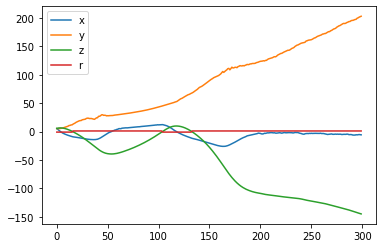

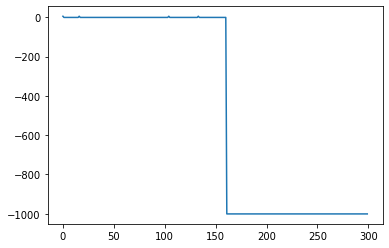

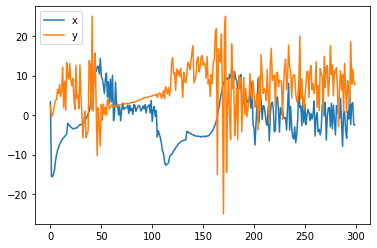

In [15]:
plt.plot(obs_hist)
plt.legend(['x', 'y', 'z', 'r'])


plt.figure()
plt.plot(reward_hist)

plt.figure()
plt.plot(action_hist)
plt.legend(['x', 'y', 'z'])

In [ ]:
obs_arr = np.stack(obs_hist)

x = obs_arr[:,0]; y = obs_arr[:,1]; z = obs_arr[:,2]

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
ax.plot(x,y,z, alpha=0.7, linewidth=1)
ax.set_title('phase diagram')


In [ ]:
plt.plot(action_hist)
plt.legend(['x', 'y', 'z'])

In [ ]:
import pandas as pd
actions_smoothed = pd.DataFrame(obs_hist).rolling(5, min_periods=5).mean()


In [ ]:
plt.plot(actions_smoothed[0:25])
plt.legend(['x', 'y', 'z'])

In [ ]:
actions_smoothed = pd.DataFrame(obs_hist).rolling(5, min_periods=5).mean()